<a href="https://colab.research.google.com/github/hitesh-bhatnagar/Car_sales_price_prediction/blob/main/Car_salesprice_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()      # upload kaagle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hiteshbhatnagar","key":"e201a58ba519471d1d6c10af03d3d68e"}'}

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d gagandeep16/car-sales

Dataset URL: https://www.kaggle.com/datasets/gagandeep16/car-sales
License(s): CC0-1.0
  0% 0.00/6.82k [00:00<?, ?B/s]
100% 6.82k/6.82k [00:00<00:00, 13.6MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/car-sales.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import os
os.listdir()

['.config', 'Car_sales.csv', 'car-sales.zip', 'kaggle.json', 'sample_data']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Import car-sales.csv file
car_sales = pd.read_csv("Car_sales.csv")
car_sales

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [ ]:
car_sales.select_dtypes(include=['object']).columns

Index(['Manufacturer', 'Model', 'Vehicle_type', 'Latest_Launch'], dtype='object')

Now , to turn object datatype features into numerical form to use them

In [ ]:
# split into x& y and train/test
X = car_sales.drop('Price_in_thousands', axis=1)
y = car_sales['Price_in_thousands']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Trying t predict with random forest on Price_in_thousands column

# from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

ValueError: could not convert string to float: 'Toyota'

## The processs of tuning categorical features into numbers is often referred to "**Encoding**"

To do this we are going to use one-hot encoding

In machine learning, one-hot encoding gives a value of 1 to the target value and a value of 0 to the other values.

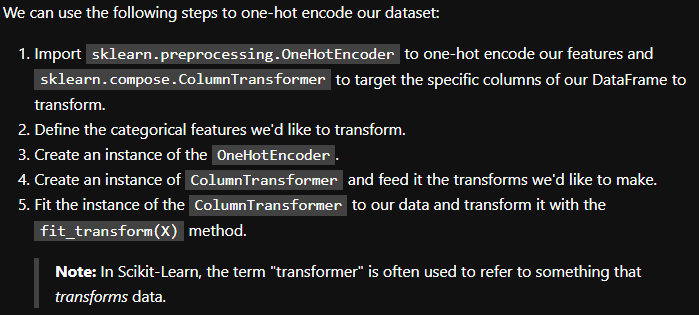

In [ ]:
car_sales.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [ ]:
X.select_dtypes(include=['object']).columns

Index(['Manufacturer', 'Model', 'Vehicle_type', 'Latest_Launch'], dtype='object')

In [ ]:
X.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [ ]:

from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
encoder = LabelEncoder()

# Encode categorical columns
X['Manufacturer'] = encoder.fit_transform(X['Manufacturer'])
X['Model'] = encoder.fit_transform(X['Model'])
X['Vehicle_type'] = encoder.fit_transform(X['Vehicle_type'])

# Encode date column using LabelEncoder
X['Latest_Launch'] = encoder.fit_transform(X['Latest_Launch'])

# Print encoded dataframe
print(X)


     Manufacturer  Model  Sales_in_thousands  __year_resale_value  \
0               0     79              16.919               16.360   
1               0    143              39.384               19.875   
2               0     25              14.114               18.225   
3               0    115               8.588               29.725   
4               1      8              20.397               22.255   
..            ...    ...                 ...                  ...   
152            29    148               3.545                  NaN   
153            29    125              15.245                  NaN   
154            29    149              17.531                  NaN   
155            29     24               3.493                  NaN   
156            29    126              18.969                  NaN   

     Vehicle_type  Engine_size  Horsepower  Wheelbase  Width  Length  \
0               1          1.8       140.0      101.2   67.3   172.4   
1               1          

In [ ]:
X.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,0,79,16.919,16.360,1,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,47,58.280150
1,0,143,39.384,19.875,1,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,93,91.370778
2,0,25,14.114,18.225,1,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,9,NaN
3,0,115,8.588,29.725,1,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,52,91.389779
4,1,8,20.397,22.255,1,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,20,62.777639


## Numerically Encoding data with pandas

By default, pd.get_dummies() also turns all of the values to bools (True or False).

We can get the returned values as 0 or 1 by setting dtype=float.

In [ ]:
# One-hot encode categorical variables
categorical_variables = ['Manufacturer', 'Model','Vehicle_type']
dummies = pd.get_dummies(data=car_sales[categorical_variables])
dummies

In [ ]:
# for Latest_Launch
X['latest_Launch'] = pd.to_datetime(X['Latest_Launch'])

# Extract useful features
X['launch_year'] = X['Latest_Launch'].dt.year
X['launch_month'] = X['Latest_Launch'].dt.month
X['launch_dayofweek'] = X['Latest_Launch'].dt.dayofweek  # Monday=0, Sunday=6

# One-hot encode categorical features
LL_encoded = pd.get_dummies(X, columns=['launch_year', 'launch_month', 'launch_dayofweek'])

print(LL_encoded)

## Create a train/test split but using new X

In [ ]:
np.random.seed(42)

# Create train and test splits with new X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create the model instance
model = RandomForestClassifier()

# fit the model on the numerical ddata
model.fit(X_train, y_train)

# Score the model ( returns r^2 metric by default , also called coefficient of determination , higher is better)
model.score(X_test,y_test)

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
car_sales_missing = car_sales.isnull().sum()
print(car_sales_missing)

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64


try and split the data into features and labels, then convert the categorical data to numbers, then split the data into training and test and then try and fit a model on it

In [ ]:
X_missing = car_sales_missing.drop("Price_in_thousands")
X_missing

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [ ]:
y_missing = car_sales_missing["Price_in_thousands"]
y_missing

2


Scikit-learn doeas have a list of odels which can handle NaNs
such as
```
from sklearn.ensemble import HistGradientBoostingRegressor

# Try a model that can handle NaNs natively
nan_model = HistGradientBoostingRegressor()
nan_model.fit(X_train, y_train)
nan_model.score(X_test, y_test)
```



In [ ]:
from sklearn.impute import SimpleImputer

# Define the imputer for the features
imputer_X = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'

# Fit and transform the features
X_imputed = imputer_X.fit_transform(X)

# Define the imputer for the target variable
imputer_y = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'

# Fit and transform the target variable
y_imputed = imputer_y.fit_transform(y.values.reshape(-1, 1)).flatten()


In [ ]:
# Convert back to DataFrame for convenience (optional)
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)
y_imputed = pd.Series(y_imputed)

In [ ]:
X_imputed.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,0.0,79.0,16.919,16.360,1.0,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,47.0,58.280150
1,0.0,143.0,39.384,19.875,1.0,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,93.0,91.370778
2,0.0,25.0,14.114,18.225,1.0,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,9.0,77.043591
3,0.0,115.0,8.588,29.725,1.0,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,52.0,91.389779
4,1.0,8.0,20.397,22.255,1.0,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,20.0,62.777639


In [ ]:
y_imputed.head()

0    21.500000
1    28.400000
2    27.390755
3    42.000000
4    23.990000
dtype: float64

In [ ]:
X_imputed_missing = X_imputed.isnull().sum()
print(X_imputed_missing)

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64


In [ ]:
y_imputed_missing = y_imputed.isnull().sum()
print(y_imputed_missing)

0


In [ ]:
np.random.seed(42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

# Fit your model (example using Linear Regression)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8447084538442238

In [ ]:
# Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred

array([54.843     , 19.00352   , 17.69887   , 29.55915529, 39.45941   ,
       20.68798   , 64.72065   , 34.91576265, 48.71505   , 16.73641   ,
       14.96724   , 23.75859   , 40.50614   , 28.53368774, 58.33444   ,
       24.32309755, 62.44125   , 19.05296   , 38.15864   , 31.72015774,
       20.24935   , 46.35819   , 27.38874019, 33.84841265, 16.56616   ,
       17.1824    , 23.61779   , 29.8261651 , 16.97409   , 34.18558755,
       17.90919   , 33.13336019])

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 53.362707485210166


In [ ]:
# To see the predictions and actual values

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

     Actual  Predicted
126  74.970  54.843000
45   19.565  19.003520
133  15.010  17.698870
138  25.545  29.559155
111  36.229  39.459410
29   24.495  20.687980
95   82.600  64.720650
97   41.000  34.915763
94   69.700  48.715050
139  16.875  16.736410
19   13.260  14.967240
56   26.935  23.758590
15   44.475  40.506140
69   26.895  28.533688
24   45.705  58.334440
30   22.245  24.323098
125  71.020  62.441250
108  18.145  19.052960
155  45.500  38.158640
65   29.465  31.720158
119  19.720  20.249350
18   46.225  46.358190
12   31.965  27.388740
9    38.900  33.848413
31   16.480  16.566160
81   17.357  17.182400
51   22.195  23.617790
128  26.100  29.826165
145  14.900  16.974090
98   41.600  34.185588
150  15.900  17.909190
75   34.605  33.133360


In [ ]:
import joblib

# Save the model to a file
joblib_filename = "Car_sales_price_prediction_model.joblib"
joblib.dump(model, joblib_filename)

['Car_sales_price_prediction_model.joblib']

In [ ]:
!pip install python-dotenv

In [ ]:
from dotenv import load_dotenv
import os

load_dotenv()

token = os.getenv('GITHUB_TOKEN')
username = os.getenv('GITHUB_USERNAME')
email = os.getenv('GITHUB_EMAIL')

In [ ]:
import os

# Replace 'your_github_token' with your actual token
os.environ['GITHUB_TOKEN'] = 'GITHUB_TOKEN'

In [ ]:
# Replace 'your_username' and 'your_new_repository' with your actual GitHub username and repository name
!git clone https://{os.environ['GITHUB_TOKEN']}@github.com/GITHUB_USERNAME/your-repo-name.git


Cloning into 'Car_sales_price_prediction'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), done.


In [ ]:
 # Move the Model File to the Repository Directory

import shutil
repo_name = "Car_sales_price_prediction"
shutil.move(joblib_filename, repo_name)

'Car_sales_price_prediction/Car_sales_price_prediction_model.joblib'

In [ ]:
import subprocess

# Change to the repository directory
os.chdir(repo_name)

# Configure Git (if not already configured)
!git config --global user.email "GITHUB_EMAIL"
!git config --global user.name "GITHUB_USERNAME"

# Add the model file
!git add {joblib_filename}

# Commit the changes
!git commit -m "Add trained Random Forest Regression model"

# Push to GitHub
!git push https://{os.environ['GITHUB_TOKEN']}@github.com/GITHUB_USERNAME/your-repo-name.git


[main 74b2bbc] Add trained Random Forest Regression model
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 Car_sales_price_prediction_model.joblib
Enumerating objects: 4, done.
Counting objects: 100% (4/4), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 224.02 KiB | 5.21 MiB/s, done.
Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
To https://github.com/hitesh-bhatnagar/Car_sales_price_prediction.git
   6c21527..74b2bbc  main -> main


In [ ]:
# check the current status of the repositry
!git status

# check the commit history to verify your commit
!git log

On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean
commit 74b2bbcb48ce36f5a11f3670f4afda9e0daf328c (HEAD -> main)
Author: hitesh-bhatnagar <hitesh.bhatnagar20@gmail.com>
Date:   Sat Jun 15 07:12:09 2024 +0000

    Add trained Random Forest Regression model

commit 6c215272621ee8a12b5bd04788ebfa429162126d (origin/main, origin/HEAD)
Author: Xenon917 <hitesh.bhatnagar20@gmail.com>
Date:   Sat Jun 15 12:28:12 2024 +0530

    Initial commit
